# Лабораторная работа 2. Доверительные интервалы.

## Reading data and creating table of interval variational series (аналогично первой лабораторной работе)

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
path_to_data = "data.xlsx"
df = pd.read_excel(path_to_data)
df.head()
writing_score = df['writing score'].copy()
reading_score = df['reading score'].copy()

writing_score.sort_values(inplace=True)
writing_score.reset_index(inplace=True, drop=True)
reading_score.sort_values(inplace=True)
reading_score.reset_index(inplace=True, drop=True)

writing_min = writing_score.min()
writing_max = writing_score.max()
writing_elements_count = writing_score.count()
writing_range = writing_max - writing_min 
writing_intervals_count = 15
writing_len_interval = writing_range / writing_intervals_count
writing_a = [writing_min + i*writing_len_interval for i in range(writing_intervals_count + 1)]
writing_indicates = writing_score.groupby(pd.cut(writing_score, writing_a, include_lowest=True)).count()
writing_indicates.name = 'indicates'
writing_frequency = writing_indicates / writing_elements_count
writing_frequency.name = 'frequency'
writing_hist = writing_frequency / writing_len_interval
writing_hist.name = "hist"
writing_points = [(writing_a[i] + writing_a[i + 1]) / 2 for i in range(writing_intervals_count)]
writing_F = writing_frequency.cumsum()
writing_F.name = 'F'
expect_writing_score = writing_points * writing_frequency
expect_writing_score.name = "expect"
expect_square_writing_score = (writing_points * writing_frequency) * writing_points
expect_square_writing_score.name = 'expect_square'

reading_min = reading_score.min()
reading_max = reading_score.max()
reading_elements_count = reading_score.count()
reading_range = reading_max - reading_min 
reading_intervals_count = 10
reading_len_interval = reading_range / reading_intervals_count
reading_a = [reading_min + i*reading_len_interval for i in range(reading_intervals_count + 1)]
reading_indicates = reading_score.groupby(pd.cut(reading_score, reading_a, include_lowest=True)).count()
reading_indicates.name = 'indicates'
reading_frequency = reading_indicates / reading_elements_count
reading_frequency.name = 'frequency'
reading_hist = reading_frequency / reading_len_interval
reading_hist.name = "hist"
reading_points = [(reading_a[i] + reading_a[i + 1]) / 2 for i in range(reading_intervals_count)]
reading_F = reading_frequency.cumsum()
reading_F.name = 'F'
expect_reading_score = reading_points * reading_frequency
expect_reading_score.name = "expect"
expect_square_reading_score = (reading_points * reading_frequency) * reading_points
expect_square_reading_score.name = 'expect_square'

## Visualization

Text(0.5, 1.0, 'Histogram')

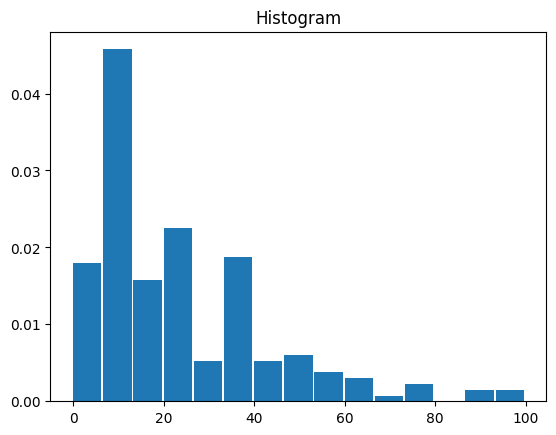

In [56]:
fig, ax = plt.subplots()
ax.bar(writing_a[:writing_intervals_count], writing_hist.values, width=writing_len_interval-0.4, align='edge')
ax.set_title('Histogram')

Text(0.5, 1.0, 'Frequency polygon')

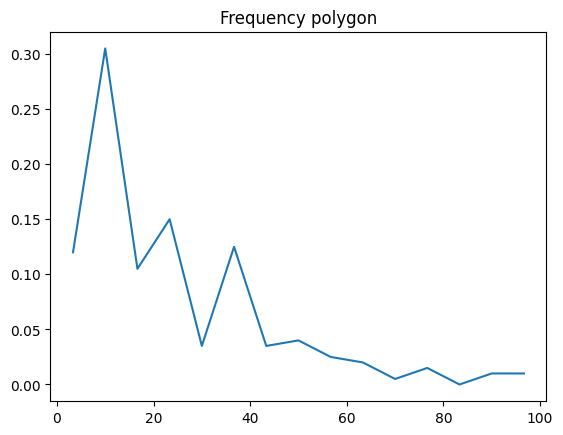

In [57]:
fig, ax = plt.subplots()
ax.plot(writing_points, writing_frequency)
ax.set_title('Frequency polygon')

Text(0.5, 1.0, 'Sample distribution function')

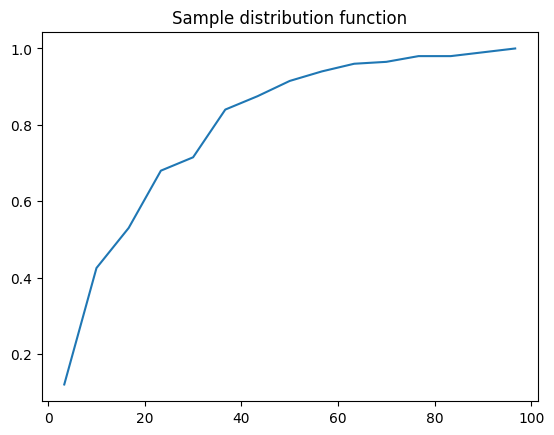

In [58]:
fig, ax = plt.subplots()
ax.plot(writing_points, writing_F.values)
ax.set_title('Sample distribution function')

10

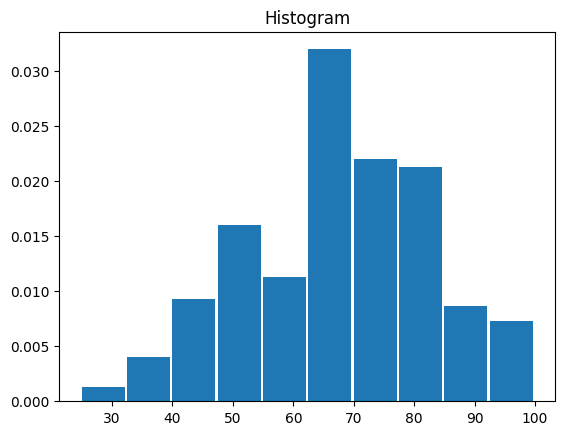

In [59]:
fig, ax = plt.subplots()
ax.bar(reading_a[:reading_intervals_count], reading_hist.values, width=reading_len_interval-0.4, align='edge')
ax.set_title('Histogram')
len(writing_a[:reading_intervals_count])

Text(0.5, 1.0, 'Frequency polygon')

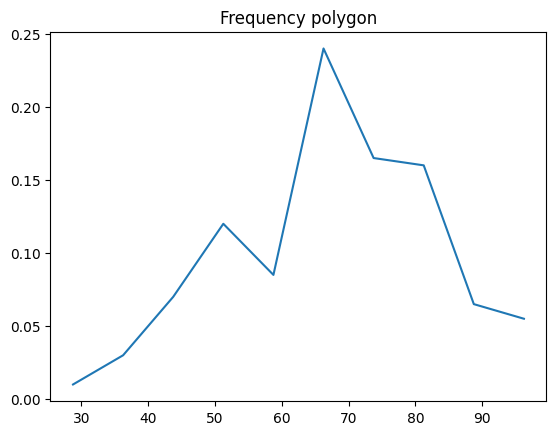

In [60]:
fig, ax = plt.subplots()
ax.plot(reading_points, reading_frequency)
ax.set_title('Frequency polygon')

Text(0.5, 1.0, 'Sample distribution function')

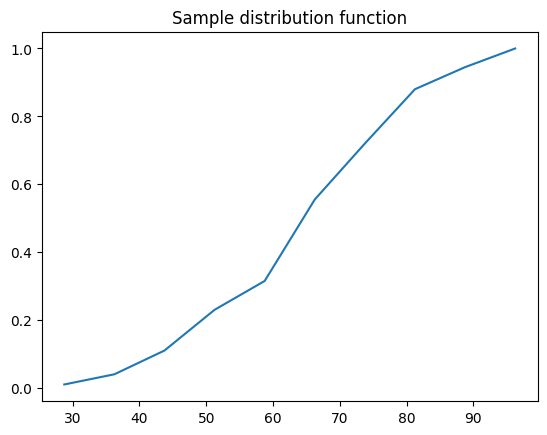

In [61]:
fig, ax = plt.subplots()
ax.plot(reading_points, reading_F.values)
ax.set_title('Sample distribution function')

## Calculation of sample statistic (аналогично первой лабораторной работе)

In [62]:
from math import sqrt
writing_sample_expect = sum(expect_writing_score)
writing_sample_var = sum(expect_square_writing_score) - (sum(expect_writing_score)) ** 2
writing_sample_var_unb = writing_elements_count/(writing_elements_count-1)*writing_sample_var
reading_sample_expect = sum(expect_reading_score)
reading_sample_var = sum(expect_square_reading_score) - (sum(expect_reading_score)) ** 2
reading_sample_var_unb = reading_elements_count/(reading_elements_count-1)*reading_sample_var
reading_std = sqrt(reading_sample_var_unb)

## Расчет доверительных интервалов уровня γ = 0.95, при условии, что reading_score из нормального распределения

### Расчет доверительного интервала для математического ожидания при известной дисперсии

$$ T_{1,2} = \overline{X} \; \mp\; \frac{\sigma c_{\gamma}}{\sqrt{n}}, \; c_{\gamma}=\Phi^{-1}(\frac{1+\gamma}{2}), \gamma=0.95$$

In [63]:
from scipy.stats import norm
sigma = 236.01
gamma = 0.95
t_1 = reading_sample_expect - sqrt(sigma)*norm.ppf((1 + gamma)/2)/sqrt(reading_elements_count)
t_2 = reading_sample_expect + sqrt(sigma)*norm.ppf((1 + gamma)/2)/sqrt(reading_elements_count)
t_1, t_2

(65.58338903967874, 69.84161096032125)

### Расчет доверительного интервала для математического ожидания при неизвестной дисперсии

$$ T_{1,2} = \overline{X} \; \mp \; \frac{S}{\sqrt{n-1}}t_{(\frac{1+\gamma}{2}), n-1}, \gamma=0.95, \text{ t - соотвествующий квантиль распредления Стьюдента с n-1 степенями свободы}$$

In [64]:
from scipy.stats import t
t_1 = reading_sample_expect - reading_std*t.ppf((1 + gamma)/2, reading_elements_count-1)/sqrt(reading_elements_count-1)
t_2 = reading_sample_expect + reading_std*t.ppf((1 + gamma)/2, reading_elements_count-1)/sqrt(reading_elements_count-1)
t_1, t_2

(65.56956384908378, 69.8554361509162)

### Расчет доверительного интервала для дисперсии при неизвестном математическом ожидании

$$ T_{1,2} = \frac{nS^2}{(\chi^{2}_{\frac{1 \pm \gamma}{2}})}, \gamma=0.95, \text{где } \chi^{2}_{\frac{1 \pm \gamma}{2}}\text{ - соотвествующие квантили распределения хи квадрат с n-1 степенями свободы} $$

In [65]:
from scipy.stats import chi2
t_1 = reading_elements_count*reading_sample_var_unb/chi2.ppf((1 + gamma)/2, reading_elements_count-1)
t_2 = reading_elements_count*reading_sample_var_unb/chi2.ppf((1 - gamma)/2, reading_elements_count-1)
t_1, t_2

(195.8702947933151, 290.44109502478125)

### Расчет доверительного интервала для дисперсии при известном математическом ожидании

$$ T_{1,2} = \frac{\sum_{i=1}^{n}{(X_i-\mu)^2}}{(\chi^{2}_{\frac{1 \pm \gamma}{2}})}, \gamma=0.95, \text{где } \chi^{2}_{\frac{1 \pm \gamma}{2}}\text{ - соотвествующие квантили распределения хи квадрат с n степенями свободы} $$

In [66]:
mu =  68.46
T = sum((reading_score - mu)**2)
t_1 = T/chi2.ppf((1 + gamma)/2, reading_elements_count)
t_2 = T/chi2.ppf((1 - gamma)/2, reading_elements_count)
t_1, t_2

(192.89009348703397, 285.7386866421233)

## Расчет доверительного интервала уровня γ = 0.95, при условии, что writing_score из показательного распределения

$$T_{1,2} = \frac{\chi^{2}_{\frac{1 \mp \gamma}{2},2n}} {2\sum_{i=1}^{n} {X_i}} \gamma=0.95, \text{где } \chi^{2}_{\frac{1 \pm \gamma}{2}}\text{ - соотвествующие квантили распределения хи квадрат с 2n степенями свободы}$$

In [72]:
# в python нет встроенного методы для оценки параметров выборки, при условии, что она из экспоненциального распределения
# значения из расчетной табоицы и с помощью методов python совпадают, так как сна их основе считается только сумма
T = 2*sum(writing_score)
t_1 = chi2.ppf((1 - gamma)/2, 2*writing_elements_count)/T
t_2 = chi2.ppf((1 + gamma)/2, 2*writing_elements_count)/T
t_1, t_2

(0.036633724398701065, 0.04835118227596373)

In [77]:
# расчитаем доверительный инетрвал для параметра встроенным методом
from scipy.stats import sem
interval = t.interval(gamma, loc=writing_score.mean(), df=len(writing_score)-1, scale=sem(writing_score))
1/interval[1], 1/interval[0]

(0.03788317214961984, 0.04786279389345374)

## Расчет доверительного интервала уровня γ = 0.95, при условии, что writing_score из Пуассоновского распределения

$$
T_{1,2} = \overline{X}+\frac{c_\gamma^2}{2n} \mp (\overline{X}\frac{c_\gamma^2}{2n} + \frac{c_\gamma^4}{4n^2})^\frac{1}{2}
$$

In [50]:
# из расчетной инетрвальной таблицы
c = norm.ppf((1 + gamma)/2)
n = writing_elements_count
t_1 = writing_sample_expect + c**2/2/n - sqrt(writing_sample_expect*c**2/n+c**4/4/n**2)
t_2 = writing_sample_expect + c**2/2/n + sqrt(writing_sample_expect*c**2/n+c**4/4/n**2)
t_1, t_2

(23.23200010580535, 24.58720718829812)

In [79]:
# с помщью методов  python
interval = t.interval(gamma, loc=writing_score.mean(), df=len(writing_score)-1, scale=sem(writing_score))
interval

(20.893055307763206, 26.396944692236794)

## Conclusion

1. Были построены доверительные интервалы, в соотвествии с теорией.
2. Данные параметры для нормального значения попали в доверительные инетрвалы, построенные на предположении, что они неизвестны, что иллюстрирует, что доверительные инетрвалы построены верно.